# Data Analysis

In [1]:
# change the python's path to the parent directory
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from tools.tools import get_data, load_data, remove_class

In [3]:
# import data
train_data = get_data("../dataset/train.csv")
test_data = get_data("../dataset/test.csv")

# perform text cleaning and get the pandas' dataframe
train_data = load_data(train_data)
test_data = load_data(test_data, has_label=False)

print(f"Number of training instances: {train_data.shape[0]}")
print(f"Number of testing instances:  {test_data.shape[0]}")

Number of training instances: 30000
Number of testing instances:  10000


In [4]:
def count_class(train_data: pd.DataFrame):
	counter = {}
	n_classes = 19
	for n in range(n_classes):
		data = train_data[train_data['class ' + str(n + 1)] == 1.]
		data = data['class ' + str(n + 1)]
		freq = data.count()
		counter['class ' + str(n + 1)] = freq
	return counter

## Create a Bar Plot

In [5]:
def bar_plot(counter: dict[str, int]):
	
	_, ax = plt.subplots()

	hbars = ax.barh(tuple(counter.keys()), counter.values())
	ax.invert_yaxis()
	ax.set_xlabel("Frequency")
	ax.set_title("Frequency of Each Class")

	ax.bar_label(hbars)
	plt.show()

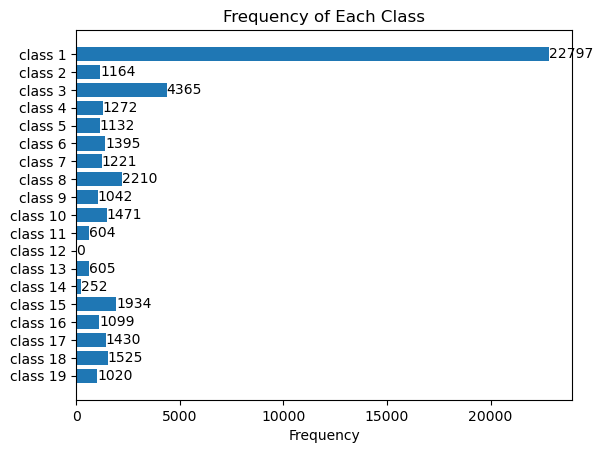

In [6]:
counter = count_class(train_data)
bar_plot(counter)

## After Removing the Imbalanced Data

In [7]:
# remove an imbalanced class
train_data = remove_class(train_data, class_no=1)
print(f"Number of training instances: {train_data.shape[0]}")

Number of training instances: 15925


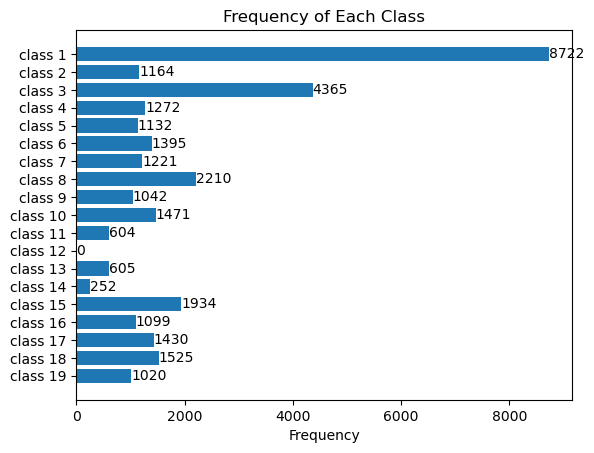

In [8]:
counter = count_class(train_data)
bar_plot(counter)

## Miscellaneous Stuff

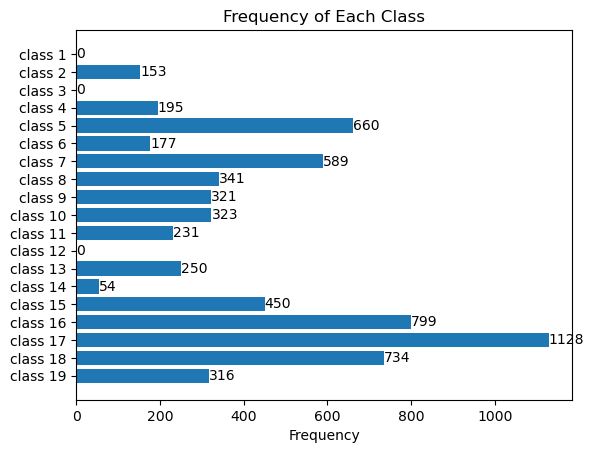

In [9]:
data = train_data[train_data['class 1'] == 0.]
data = data[data['class 3'] == 0.]

counter = count_class(data)
bar_plot(counter)

### Aim: Generate data for the minority classes

In [10]:
import torch

from torchvision import transforms
from PIL import Image

# image file name ends at 39999.jpg
START = 40000

def generate_data(data: pd.DataFrame, start: int, n: int):
	"""
	Generate data 'n' number of times.
	"""
	result = []
	for i in range(n):

		# transform each image to create new image data
		ls = []
		for i, img_id in enumerate(data['image_id']):
			img = Image.open(f"./dataset/data/{img_id}").convert("RGB")

			# define transformation
			transform = transforms.Compose([
				transforms.RandomHorizontalFlip(),
				transforms.Resize((232, 232)),
				transforms.RandomCrop((224, 224)),
				transforms.RandomRotation(torch.randint(low=0, high=359, size=(1,)).item()),
				transforms.RandomVerticalFlip(),
				transforms.ColorJitter(),
			])

			# transform and save the image
			img = transform(img)
			img.save(f"./dataset/data/{start}.jpg")

			# add to a new list
			new_ls = [f"{start}.jpg"] + data.iloc[i, 1:].to_list()
			ls.append(new_ls)

			# increase the index
			start += 1

		# add to result
		result += ls

	result = pd.DataFrame(result, columns=train_data.columns)
	return result

# result = generate_data(data, START, 4)